# Enscheidungsbäume (Decision Trees)

Ein Entscheidungsbaum ist ein Modell zur Entscheidungsfindung, das Daten durch eine Reihe von Bedingungen in verschiedene Kategorien oder Werte unterteilt. Er besteht aus folgenden Hauptelementen:

* __Wurzelknoten__: Der Startpunkt des Baums, an dem die erste Entscheidungsregel angewendet wird.
* __Innere Knoten__: Diese repräsentieren Bedingungen, die die Daten weiter aufteilen.
* __Blätter__ (Endknoten): Diese enthalten die endgültige Entscheidung oder Vorhersage

 
Der Entscheidungsbaum wird durch einen rekursiven Prozess erstellt:

Zuerst wird das Kriterium mit der höchsten Trennkraft (z. B. die Variable, die den besten Informationsgewinn bietet) als erste Entscheidungsregel gewählt. Die Daten werden entsprechend dieser Regel aufgeteilt. Dieser Prozess wird für jede neu entstandene Gruppe wiederholt, bis eine Stoppregel greift (z. B. keine signifikanten Verbesserungen mehr möglich oder eine Mindestanzahl an Datenpunkten erreicht wurde).

## Wann verwendet man Entscheidungsbäume?

Entscheidungsbäume finden Anwendung in vielen Bereichen, z. B.:

* **Medizin**: Diagnose von Krankheiten anhand von Symptomen.
* **Finanzwesen**: Kreditwürdigkeitsprüfung, Betrugserkennung.
* **Marketing**: Kundensegmentierung, Kaufvorhersagen.
* **Industrie**: Qualitätskontrolle, Fehlerdiagnose.
* **IT & Sicherheit**: Spam-Erkennung, Intrusion Detection.

Entscheidungsbäume bilden die Grundlage für mächtigere Verfahren wie **Random Forests**

## Wie funktionieren Entscheidungsbäume?

1. Der Baum wird anhand von Trainingsdaten erstellt.
1. Das Lernverfahren sucht die beste Aufteilung der Daten nach einem Kriterium (z. B. Gini-Index, Entropie oder Varianzreduktion).
1. Bei der Klassifikation werden die Daten so lange aufgeteilt, bis alle Elemente eines Knotens zur gleichen Klasse gehören
1. Neue Daten durchlaufen den Baum von der Wurzel bis zu einem Blatt und erhalten dort ihre Vorhersage.

## Beispiel Iris-DB

Wir entwickeln für die Iris-DB einen Entscheidungbaum, der die Eingabedaten klassifizieren kann.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Wir testen den Entscheidungsbaum auf den Testdaten:

In [17]:
print(f"Genauigkeit auf Testdaten: {model.score(X_test, y_test):.2%}")

Genauigkeit auf Testdaten: 100.00%


## Visualisierung des Entscheidungsbaums

Bei wenigen Features hat man die Möglichkeit, den Entscheidungsbaum grafisch darstellen zu können, um zu verstehen, was vor sicht geht. 

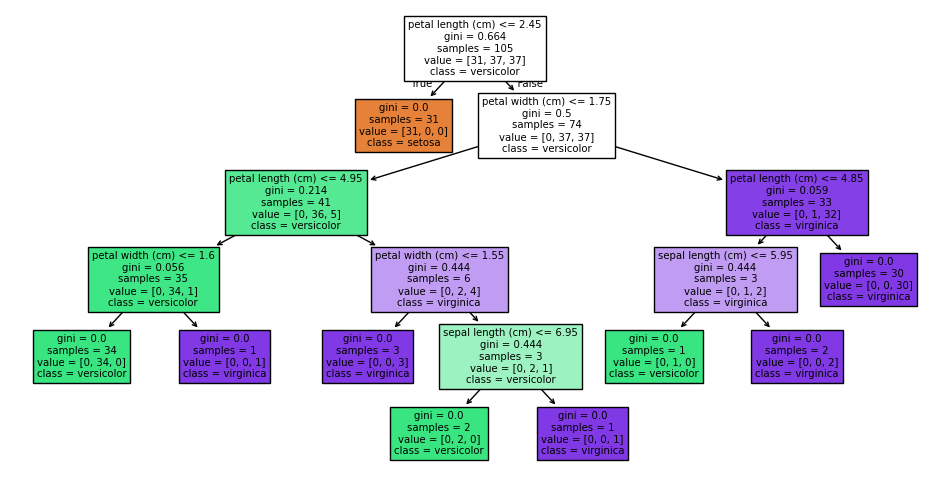

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Sehr schön sieht man anhand der Farben, was vor sich geht. Die Blätter haben eine "reine" Farbe, während an den Knoten noch eine "gemischte" Farbe vorliegt.

## Beispiel: Schätzung eines Hauspreises

Uns liegt eine Tabelle von Preisen vor, für die in den letzten Jahren Häuser verkauft wurden. Sie enthält auch viele verschiedenen Features, wie Lage, Anzahl der Stockwerke, Größe, Anzahl der Raume etc. Gesucht ist ein Entscheidungsbaum, mit dem wir aufgrund der Features eines Hause dessen preis abschätzen können.

Wir verwenden nur wenige Features, damit die Analyse nicht zu komplex wird. Die Auswahl der Features ist sicher auch eine der Aufgaben des Data Scientists, die durch das Fachwissen unterstützt werden muss.

In [20]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target

### Zerlegung in Trainings- und Testdaten

Wie üblich zerlegen wir die daten in einen Trainings- und einen Testbereich:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Der Entscheidungsbaum

Wir erstellen einen Entscheidungsbaum durch Eingabe der vorbereiteten Daten:

In [22]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [24]:
score = reg.score(X_test, y_test)
print(f"Bewertung auf Testdaten (R^2): {score:.2}")

Bewertung auf Testdaten (R^2): 0.51


## Anzeige des Entscheidungsbaums

Mit `sklearn` kann man sich den Entscheidungsbaum auch anzeigen lassen. Dabei wir aus der Grafik bei grßen Datenmengen schnell eine Tapete und dauert entsprechend lange


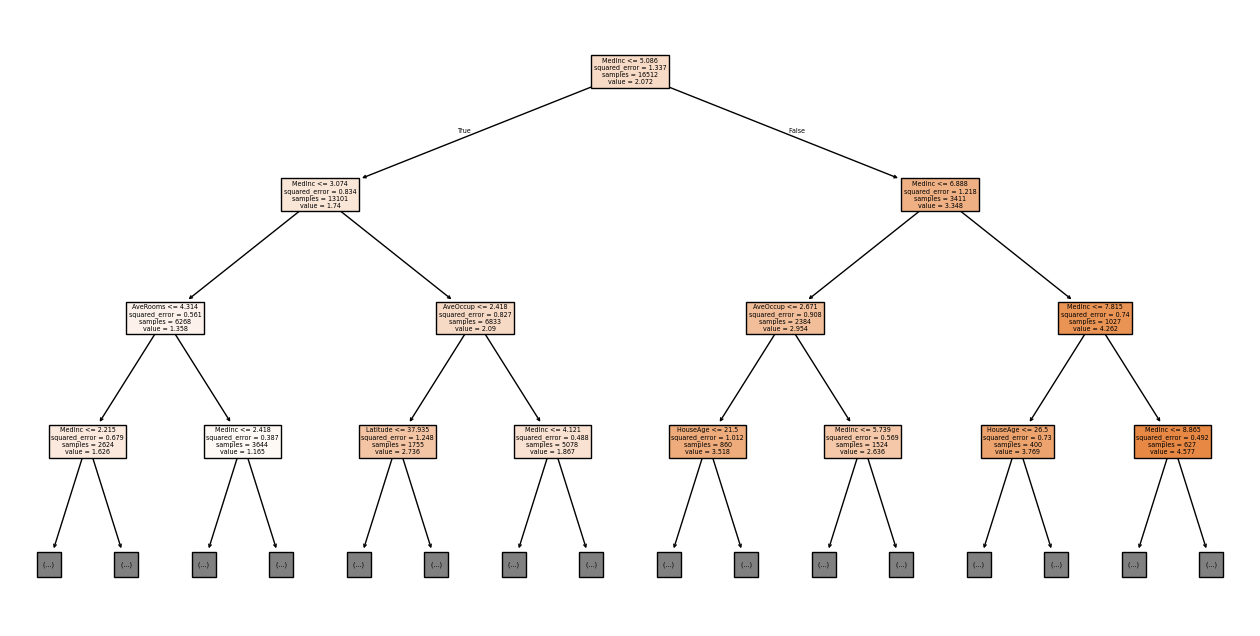

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(reg, filled=True, feature_names=housing.feature_names,  max_depth=3 )
plt.show()
